In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import import_ipynb
import Classes


importing Jupyter notebook from Classes.ipynb


C:\Users\Asiye\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv("hmelq.csv")

In [3]:
information = Classes.Information(data)
information.data_features()

--------------------------  DATA HEAD --------------------------

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  

--------------------------  DATA DESCRIBE --------------------------

          count           mean           std      min       25%        50%  \
bad      3576.0       0.199385      0.399594     0.00      0.00      0.000   
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  16200.000  

In [4]:
data['bad'].value_counts()

0    2863
1     713
Name: bad, dtype: int64

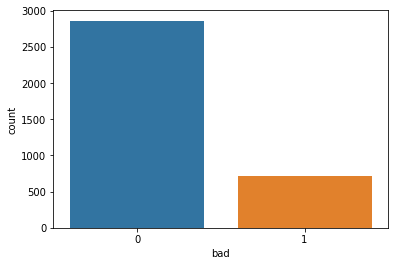

In [5]:
sns.countplot(x = 'bad', data = data)
plt.show()

In [6]:
count_no_sub = len(data[data['bad']==0])
count_sub = len(data[data['bad']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Kredisini Ödeyenler", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Kredisini Ödemeyenler", pct_of_sub*100)

Kredisini Ödeyenler 80.06152125279642
Kredisini Ödemeyenler 19.938478747203582


In [7]:
data.groupby('bad').mean()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,,,,,,,,,,
0,18931.645127,75242.395117,102394.448489,9.031378,0.140732,0.238263,186.338950,1.032692,21.552536,33.179142
1,16915.708275,69029.488140,95308.460184,8.067533,0.716012,1.174888,153.497474,1.780089,21.323572,40.881416


# Yorum : 

<ul>
    <li>Kredisini ödeyenlerin( bad =0) , kredi talep miktarı ortalamasının(loan), kredisini ödemeyenlerin(bad =1) kredi talep miktarı ortalamasından yüksektir. Bu durumda kredisini ödeyebilenler yüksek kredi talebinde bulunmuştur diyebiliriz</li>
  <li> Negatif rapor sayıları fazla olan bireylerin (derog) çoğukredisini ödememiştir.</li>
    <li> Kredilerini ödeyen bireylerin borç/gelir oranı (debtinc) , kredilerini ödeyemeyen bireylerden daha düşüktür</li>
</ul>

In [8]:
# Kategorik değişkenlerin gruplandırılması

data.groupby('job').mean()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
job,,,,,,,,,,,
Mgr,0.232104,19084.598698,83964.704189,108464.106133,8.919318,0.320707,0.594203,174.285822,1.517564,23.097561,35.307687
Office,0.131810,18048.857645,68058.197973,94675.024670,8.103011,0.136905,0.445076,178.784840,0.936803,21.425795,34.158283
Other,0.232006,18006.918239,60064.432343,84251.694202,9.403457,0.313281,0.417183,174.026556,1.333836,19.572139,34.260072
ProfEx,0.166884,18750.717080,92690.971376,128851.319683,8.731349,0.203911,0.376871,196.769973,0.949728,24.503989,32.622049
Sales,0.348485,15251.515152,79856.864407,105960.969231,7.476667,0.450000,0.274194,202.301667,0.772727,24.272727,38.326064
Self,0.295652,27923.478261,102575.392523,147150.513274,7.210185,0.221239,0.551402,176.590526,1.404040,24.271930,36.824762


<ul>
    <li>Mesleklere göre kredi talep miktarları değişmektedir.(loan)</li>
</ul>

In [9]:
data.groupby('reason').mean()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
reason,,,,,,,,,,,
DebtCon,0.185576,19868.705188,74483.615277,101611.714495,8.551114,0.261098,0.409427,176.176174,1.343708,22.287742,34.301599
HomeImp,0.230624,15892.911153,73308.909702,100007.497760,9.411429,0.245596,0.455852,185.208453,0.845361,19.905273,33.496014


<ul>
    <li>Ev kredisi alanların kredi talep tutarları , borç kredisi alanların kredi talep tutarlarından düşüktür.(loan)</li>
</ul>


# Görselleştime :

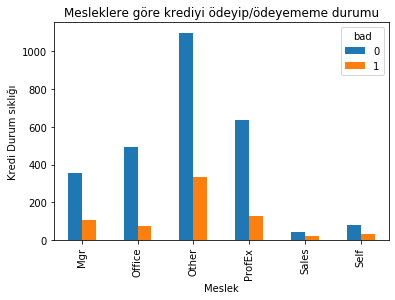

In [10]:
pd.crosstab(data.job,data.bad).plot(kind='bar')
plt.title('Mesleklere göre krediyi ödeyip/ödeyememe durumu')
plt.xlabel('Meslek')
plt.ylabel('Kredi Durum sıklığı')
plt.savefig('purchase_fre_job')

<ul>
    <li>Krediyi ödeyebilme(bad = 0) , büyük ölçüde mesleklere bağlı .Dolayısıyla iş unvanı, sonuç değişkeninin iyi bir öngörücüsü olabilir.</li>
    </ul>

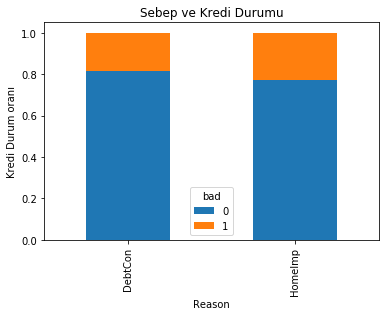

In [11]:
table=pd.crosstab(data.reason,data.bad)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sebep ve Kredi Durumu')
plt.xlabel('Reason')
plt.ylabel('Kredi Durum oranı')
plt.savefig('reason_vs_pur_stack')

<ul><li>Kredi talep sebebi , y değişkeni için güçlü bir yordayıcı görünmemektedir.</li></ul>

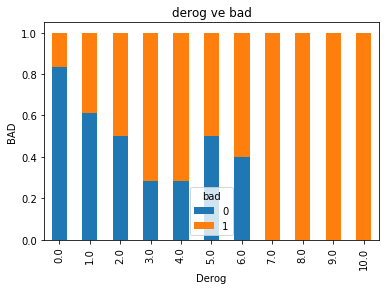

In [12]:
table=pd.crosstab(data.derog,data.bad)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('derog ve bad')
plt.xlabel('Derog')
plt.ylabel('BAD')
plt.savefig('derog_vs_pur_stack')

<ul><li>Negatif raporlara sahip bireylerin kredilerini ödeyip ödeyememelerinde iyi bir öngörücü olabilir</li></ul>

In [13]:
# Preprocess

p = Classes.Preprocess(data)
p.get_missing_values()

------------  Missing Values  -------------


debtinc    767
derog      427
delinq     351
mortdue    314
yoj        312
ninq       303
clage      179
job        167
reason     147
clno       133
value       64
loan         0
bad          0
dtype: int64

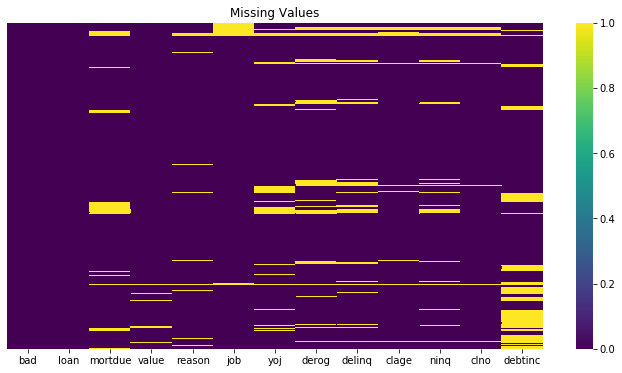

In [14]:
# Visualize Missing Values

v = Classes.Visualizer()
v.missing_values(data)

In [15]:

p.drop('any')

Drop Öncesi Data Shape -->    (3576, 13)
Drop Sonrası Data Shape -->    (2018, 13)
------------  Missing Values  -------------


debtinc    0
clno       0
ninq       0
clage      0
delinq     0
derog      0
yoj        0
job        0
reason     0
value      0
mortdue    0
loan       0
bad        0
dtype: int64

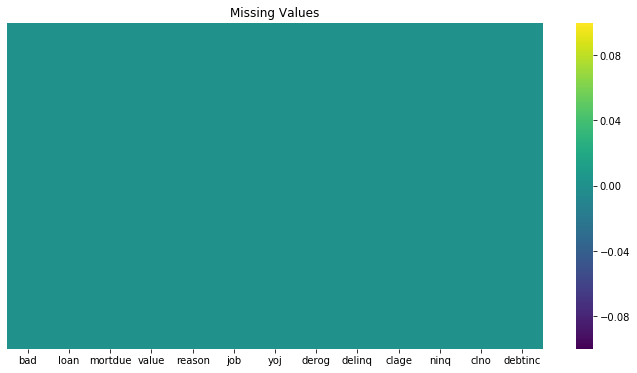

In [16]:
v.missing_values(data)

In [17]:
# DUMMIES

HomeImp = pd.get_dummies(data['reason'], drop_first =True)
jobs = pd.get_dummies(data['job'], drop_first =True)
data=pd.concat([data,HomeImp,jobs],axis=1)
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,HomeImp,Office,Other,ProfEx,Sales,Self
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,0,0,0,0,0
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,0,0,0,0,0
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,0,0,0,0,0
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,0,0,0,0,0


In [18]:
data.drop(['reason','job'],axis =1,inplace=True)
data.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,HomeImp,Office,Other,ProfEx,Sales,Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,0,0,0,0,0


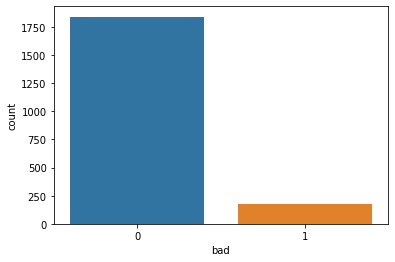

In [19]:
sns.countplot(x = 'bad', data = data)
plt.show()

# SMOTE

In [20]:
X = data.loc[:, data.columns != 'bad']
y = data.loc[:, data.columns == 'bad']


In [21]:
os_data_X, os_data_y = p.SMOTE(X,y)

In [22]:
print("oversampled verilerin uzunluğu ",len(os_data_X))
print("Y değişkeni  0  :",len(os_data_y[os_data_y['bad']==0]))
print("Y değişkeni  1  :",len(os_data_y[os_data_y['bad']==1]))


oversampled verilerin uzunluğu  2574
Y değişkeni  0  : 1287
Y değişkeni  1  : 1287


# Logistic Regression Model

Grid Search Helper
------------------     STATS  MODELS  --------------------

Optimization terminated successfully.
         Current function value: 0.538330
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 2574
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2234
Time:                        17:07:17   Log-Likelihood:                -1385.7
converged:                       True   LL-Null:                       -1784.2
Covariance Type:            nonrobust   LLR p-value:                3.732e-160
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -1.291e-05   5.59e

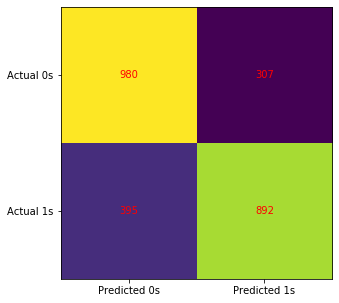

Accuracy  Score :   0.7272727272727273
Classification Report  : 
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      1287
           1       0.74      0.69      0.72      1287

    accuracy                           0.73      2574
   macro avg       0.73      0.73      0.73      2574
weighted avg       0.73      0.73      0.73      2574

-------------- ROC CURVE  --------------------



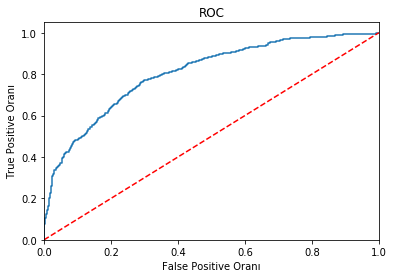

-------------- TRAIN - TEST SPLIT  --------------------

Accuracy  Score  :  0.7533980582524272
Classification Report  : 
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       263
           1       0.76      0.72      0.74       252

    accuracy                           0.75       515
   macro avg       0.75      0.75      0.75       515
weighted avg       0.75      0.75      0.75       515

Cross Validation Score  :   0.7087445573294631


In [23]:
model = Classes.GridSearchHelper()
model.LogReg(os_data_X, os_data_y)

In [24]:
os_data_X.drop(['mortdue'],axis =1,inplace=True)

------------------     STATS  MODELS  --------------------

Optimization terminated successfully.
         Current function value: 0.538344
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 2574
Model:                          Logit   Df Residuals:                     2559
Method:                           MLE   Df Model:                           14
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2233
Time:                        17:07:19   Log-Likelihood:                -1385.7
converged:                       True   LL-Null:                       -1784.2
Covariance Type:            nonrobust   LLR p-value:                5.021e-161
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -1.269e-05   5.53e-06     -2.295     

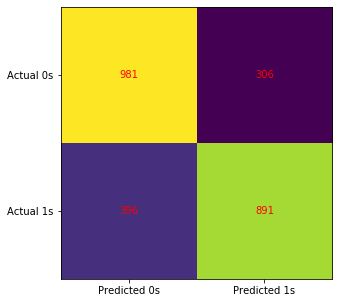

Accuracy  Score :   0.7272727272727273
Classification Report  : 
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      1287
           1       0.74      0.69      0.72      1287

    accuracy                           0.73      2574
   macro avg       0.73      0.73      0.73      2574
weighted avg       0.73      0.73      0.73      2574

-------------- ROC CURVE  --------------------



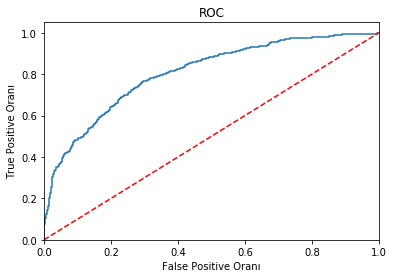

-------------- TRAIN - TEST SPLIT  --------------------

Accuracy  Score  :  0.7572815533980582
Classification Report  : 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       263
           1       0.77      0.73      0.75       252

    accuracy                           0.76       515
   macro avg       0.76      0.76      0.76       515
weighted avg       0.76      0.76      0.76       515

Cross Validation Score  :   0.7186224707589858


In [25]:
model.LogReg(os_data_X, os_data_y)

------------------     STATS  MODELS  --------------------

Optimization terminated successfully.
         Current function value: 0.538404
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 2574
Model:                          Logit   Df Residuals:                     2560
Method:                           MLE   Df Model:                           13
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2232
Time:                        17:07:20   Log-Likelihood:                -1385.9
converged:                       True   LL-Null:                       -1784.2
Covariance Type:            nonrobust   LLR p-value:                7.327e-162
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -1.118e-05   4.79e-06     -2.333     

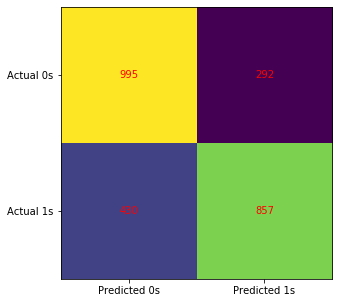

Accuracy  Score :   0.7195027195027195
Classification Report  : 
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1287
           1       0.75      0.67      0.70      1287

    accuracy                           0.72      2574
   macro avg       0.72      0.72      0.72      2574
weighted avg       0.72      0.72      0.72      2574

-------------- ROC CURVE  --------------------



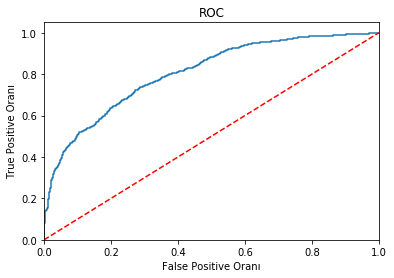

-------------- TRAIN - TEST SPLIT  --------------------

Accuracy  Score  :  0.7339805825242719
Classification Report  : 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       263
           1       0.76      0.66      0.71       252

    accuracy                           0.73       515
   macro avg       0.74      0.73      0.73       515
weighted avg       0.74      0.73      0.73       515

Cross Validation Score  :   0.7144775036284471


In [26]:
os_data_X.drop(['value'],axis =1,inplace=True)
model.LogReg(os_data_X, os_data_y)

------------------     STATS  MODELS  --------------------

Optimization terminated successfully.
         Current function value: 0.538760
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 2574
Model:                          Logit   Df Residuals:                     2561
Method:                           MLE   Df Model:                           12
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2227
Time:                        17:07:22   Log-Likelihood:                -1386.8
converged:                       True   LL-Null:                       -1784.2
Covariance Type:            nonrobust   LLR p-value:                2.173e-162
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -9.726e-06   4.65e-06     -2.090     

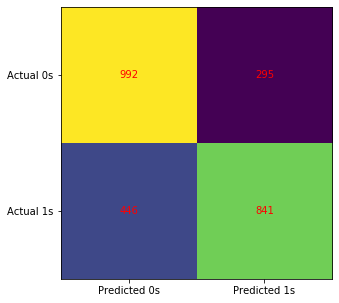

Accuracy  Score :   0.7121212121212122
Classification Report  : 
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1287
           1       0.74      0.65      0.69      1287

    accuracy                           0.71      2574
   macro avg       0.72      0.71      0.71      2574
weighted avg       0.72      0.71      0.71      2574

-------------- ROC CURVE  --------------------



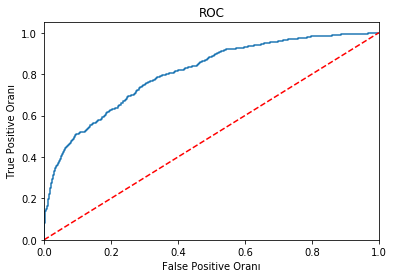

-------------- TRAIN - TEST SPLIT  --------------------

Accuracy  Score  :  0.7378640776699029
Classification Report  : 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       263
           1       0.77      0.66      0.71       252

    accuracy                           0.74       515
   macro avg       0.74      0.74      0.74       515
weighted avg       0.74      0.74      0.74       515

Cross Validation Score  :   0.7125167193147216


In [27]:
os_data_X.drop(['Self'],axis =1,inplace=True)
model.LogReg(os_data_X, os_data_y)